# BLUESKY

This notebook demos the webscraping and analysis abilities of BLUESKY.
BLUESKY is a Python package that returns information about vehicle prices.

In [8]:
# IMPORT STATEMENTS
from BLUESKY.scrapers.bs4_scraper import scrape_data_payload
from BLUESKY.scrapers.genurls import gen_cars_com_urls
#from BLUESKY.stats.clean import delta_years


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Generating Target URLS to scrape from

In [11]:
car_dict = {
    "ford": ["mustang", "f_150"],
    "toyota": ["camry", "supra"],
    "bmw": ["330", "z4"]
}

url_targets = gen_cars_com_urls(input_dict=car_dict)
#url_targets

In [12]:
temp = scrape_data_payload(url_targets)

Processing the scraped data

In [13]:
columns = ["make", "model", "model_year", "trim", "mileage", "price", "listing_id", "bodystyle", ] 

df = pd.DataFrame(temp, columns=columns)

In [21]:
%%capture --no-stdout --no-display

mustangs = df[
    (df["make"] == "ford")
    & (df["model"] == "mustang")
    & (df["trim"] == ("gt"))
]

supras = df[
    (df["make"] == "toyota")
    & (df["model"] == "supra")
    & (df["trim"] == ("3.0"))
]

camrys = df[
    (df["make"] == "toyota")
    & (df["model"] == "camry")
    & (df["trim"] == "se")
]

z4s = df[
    (df["make"] == "bmw")
    & (df["model"] == "z4")
    # & (df["trim"] == "se")
]

mustangs["year_delta"] = int(mustangs["model_year"].max()) - mustangs["model_year"].astype(int)
mustangs["price_pct"] = mustangs["price"].astype(float) / float(mustangs["price"].max()) - 1

supras["year_delta"] = int(supras["model_year"].max()) - supras["model_year"].astype(int)
supras["price_pct"] = supras["price"].astype(float) / float(supras["price"].max()) - 1

camrys["year_delta"] = int(camrys["model_year"].max()) - camrys["model_year"].astype(int)
camrys["price_pct"] = camrys["price"].astype(float) / float(camrys["price"].max()) - 1

z4s["year_delta"] = int(z4s["model_year"].max()) - z4s["model_year"].astype(int)
z4s["price_pct"] = z4s["price"].astype(float) / float(z4s["price"].max()) - 1


Beginning analysis. 

TODO:
- change model years to delta time from present
- depreciation per mile, per year
    - per mile per year?

['3.0si_roadster', 'sdrive28i', 'sdrive30i', '3.0i_roadster', 'sdrive35is', 'sdrive35i', '2.5i_roadster', 'm40i', '3.0si', '']


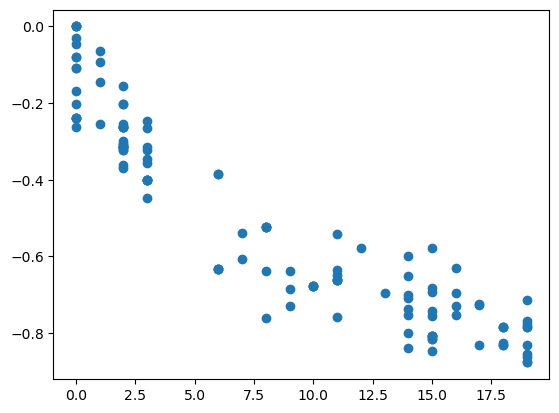

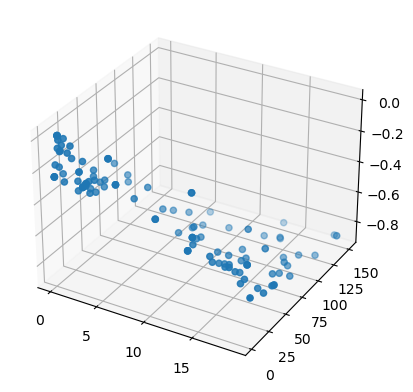

In [37]:
plt.figure(1)
plt.scatter(z4s["year_delta"], z4s["price_pct"])
plt.figure(2)
ax = plt.axes(projection ="3d")
ax.scatter3D(z4s["year_delta"], z4s["mileage"].values.astype(float)/1000, z4s["price_pct"])
trims = list(z4s["trim"].unique())
print(trims)